In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/PP/Downloads/car data.csv", )
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Now lets create a seprate column giving us the depreciation of each car and add the column to our main data frame.

In [3]:
car_depreciation = df['Present_Price'] - df['Selling_Price']
df['depreciation'] = car_depreciation
car_depreciation

0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
       ... 
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Length: 301, dtype: float64

In [ ]:
#Great! Now we know exactly how much depreciation has happened for every car. 
#Also we need to represent this by car's name and not by serial number. 
#So lets make a seprate dataset and include the variables 
#we are going to use to visualise our data which would help us see which car has the best and worst re-sale values

In [4]:
depr = df[['Car_Name', 'depreciation']]
depr.head()

,Car_Name,depreciation
0,ritz,2.24
1,sx4,4.79
2,ciaz,2.60
3,wagon r,1.30
4,swift,2.27


In [ ]:
# Using group by and then sorting it in descending order gives us the car with the maximum depreciation

In [5]:
grouped = depr.groupby('Car_Name').mean()
grouped.sort_values('depreciation', ascending=False)

,depreciation
Car_Name,
land cruiser,57.600000
camry,21.230000
fortuner,12.047273
corolla,10.850000
corolla altis,10.399375
...,...
Honda Dream Yuga,0.060000
Hero Passion X pro,0.050000
Bajaj Avenger 150,0.050000


In [6]:
df['Car_Name'].value_counts().head(30)

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Name: Car_Name, dtype: int64

In [ ]:
# We can see that Cars like Land Cruiser, Camry, Corolla does not have much samples
# hence we would not be discussing them further in detail

In [ ]:
# Lets analyse why other cars have such high depreciation and analyze some cars indvidually

In [7]:
temp = df.loc[df['Car_Name'] == 'fortuner']
temp.head(11)# since fortuner has 11 samples

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0,12.46
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3.23
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0,11.20
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0,16.11
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61


In [ ]:
# Now lets plot the same on a bar graph using matplotlib which will give us 
# an better understanding of depreciation of fortuner for its make year.

Text(0, 0.5, 'Depreciation in lacs')

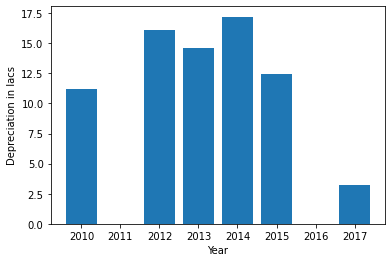

In [8]:
plt.bar(x = temp['Year'], height=temp['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [ ]:
# The above bar graph shows us that depreciation of fortuner does not completely depends on its make year

In [ ]:
# Now lets do the same for some other cars

In [9]:
temp_1 = df.loc[df['Car_Name'] == 'city']
temp_1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,4.90
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,2.70
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,4.65
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,3.35
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,5.10


Text(0, 0.5, 'Depreciation in lacs')

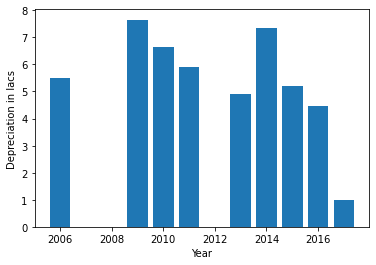

In [10]:
plt.bar(x = temp_1['Year'], height=temp_1['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [ ]:
# The above graph gives us an idea about depreciation of city over its make year, which is also not constant

In [11]:
temp_2 = df.loc[df['Car_Name'] == 'corolla altis']
temp_2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0,11.44
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,13.79
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0,11.66
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,9.39
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66


Text(0, 0.5, 'Depreciation in lacs')

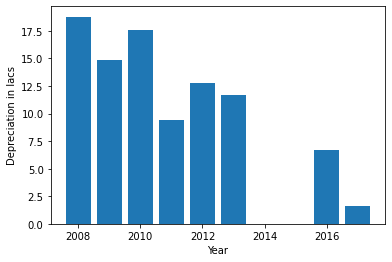

In [12]:
plt.bar(x = temp_2['Year'], height=temp_2['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [13]:
temp_3 = df.loc[df['Car_Name'] == 'verna']
temp_3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0,4.90
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0,2.95
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0,4.90
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0,1.15
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0,4.29


Text(0, 0.5, 'Depreciation in lacs')

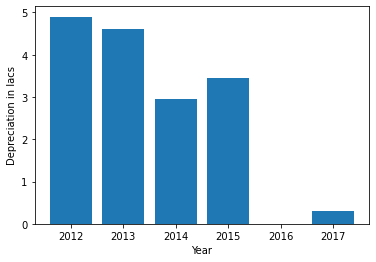

In [14]:
plt.bar(x = temp_3['Year'], height=temp_3['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [ ]:
# The bar graph for verna and corolla altis gives us a more constant depreciation than city and fortuner, 
# hence leaves us with a mixed idea of make year being the most important factor in depreciation.

In [ ]:
# Now let us analyze some more variables

In [15]:
kms = df[['Car_Name', 'Kms_Driven']]
kms.head()

,Car_Name,Kms_Driven
0,ritz,27000
1,sx4,43000
2,ciaz,6900
3,wagon r,5200
4,swift,42450


In [16]:
by_kms_driven = kms.groupby('Car_Name').mean().tail(30)
by_kms_driven.sort_values('Kms_Driven', ascending=False)

,Kms_Driven
Car_Name,
corolla,135154.000000
land cruiser,78000.000000
fortuner,62702.818182
innova,58713.111111
etios cross,54707.333333
corolla altis,54293.875000
dzire,54243.500000
etios liva,51500.000000
sx4,50740.000000


In [ ]:
# Now lets study the bar graphs for depreciation of different cars based on the kilometeres they are driven

In [17]:
temp_4 = df.loc[df['Car_Name'] == 'city']
temp_4.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,4.90
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,2.70
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,4.65
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,3.35
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,5.10


Text(0, 0.5, 'Kms Driven')

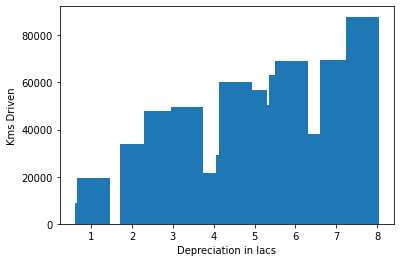

In [18]:
plt.bar(x = temp_4['depreciation'], height=temp_4['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [19]:
temp_5 = df.loc[df['Car_Name'] == 'fortuner']
temp_5.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21


Text(0, 0.5, 'Kms Driven')

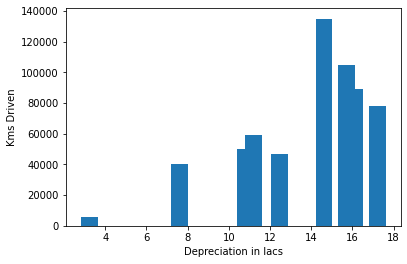

In [20]:
plt.bar(x = temp_5['depreciation'], height=temp_5['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [21]:
temp_6 = df.loc[df['Car_Name'] == 'corolla altis']
temp_6.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0,11.44
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,13.79
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0,11.66
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,9.39
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66


Text(0, 0.5, 'Kms Driven')

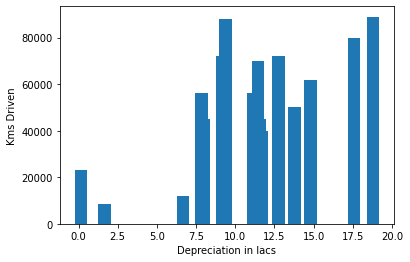

In [22]:
plt.bar(x = temp_6['depreciation'], height=temp_6['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [23]:
temp_7 = df.loc[df['Car_Name'] == 'verna']
temp_7.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0,4.90
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0,2.95
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0,4.90
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0,1.15
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0,4.29


Text(0, 0.5, 'Kms Driven')

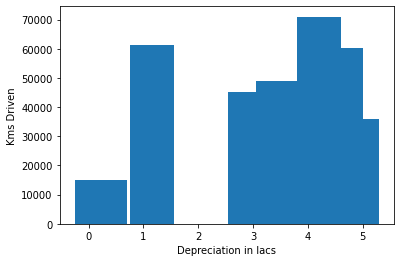

In [24]:
plt.bar(x = temp_7['depreciation'], height=temp_7['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [ ]:
# The above graph shows somewhat constant behaviour for depreciation agaist kms driven, 
# howevere even kms driven cannot be considered as sole factor affecting depreciation.

In [ ]:
# for studying other variables we need to transform them to get a better 
# understanding of their importance in depreciation of car.

In [ ]:
# Let us now transform our categoricals values into numerical

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
le.fit(df['Fuel_Type'])

LabelEncoder()

In [28]:
LabelEncoder()

LabelEncoder()

In [29]:
le.classes_

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [31]:
le.fit(df['Seller_Type'])

LabelEncoder()

In [32]:
LabelEncoder()

LabelEncoder()

In [33]:
df['Seller_Type'] = le.transform(df['Seller_Type'])

In [34]:
le.classes_

array(['Dealer', 'Individual'], dtype=object)

In [35]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,0,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,0,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,0,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,0,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,0,Manual,0,2.27


In [36]:
le.fit(df['Transmission'])

LabelEncoder()

In [37]:
df['Transmission'] = le.transform(df['Transmission'])

In [38]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,0,1,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,0,1,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,0,1,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,0,1,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,0,1,0,2.27


In [39]:
by_fuel_type = df[['Car_Name', 'Fuel_Type', 'depreciation']]
by_fuel_type.head()

,Car_Name,Fuel_Type,depreciation
0,ritz,Petrol,2.24
1,sx4,Diesel,4.79
2,ciaz,Petrol,2.60
3,wagon r,Petrol,1.30
4,swift,Diesel,2.27


In [40]:
fuel_t = by_fuel_type.groupby('Fuel_Type').mean()

In [41]:
fuel_t.head()

,depreciation
Fuel_Type,
CNG,3.315000
Diesel,5.536000
Petrol,2.319372


In [ ]:
# The Fuel type '0'is CNG, '1' is diesel and '2' is petrol, 
# hence we know from this that diesel cars have the max depreciation,
# however this is not concerte as other factors also have an important say than just fuel type

In [42]:
by_seller_t = df[['Car_Name', 'Seller_Type', 'depreciation']]
by_seller_t.head()

,Car_Name,Seller_Type,depreciation
0,ritz,0,2.24
1,sx4,0,4.79
2,ciaz,0,2.60
3,wagon r,0,1.30
4,swift,0,2.27


In [43]:
seller_t = by_seller_t.groupby('Seller_Type').mean()
# by_kms_driven.sort_values('Kms_Driven', ascending=False)
seller_t.head()

,depreciation
Seller_Type,
0,4.164615
1,0.764340


In [ ]:
#From this we know that '0' is automatic and '1' is manual,
#howevere even this does not helps our purpose of getting accurate relationship.

In [ ]:
# Let us plot some more graphs to get some better insights

In [ ]:
# Let us plot a pair plot to get better understanding of how the variables Kms_Driven 
# and Year affects depreciation, we will be using seaborn for this

In [44]:
new_df = df[['Car_Name', 'Year', 'Kms_Driven', 'depreciation']]
new_df.head()

,Car_Name,Year,Kms_Driven,depreciation
0,ritz,2014,27000,2.24
1,sx4,2013,43000,4.79
2,ciaz,2017,6900,2.60
3,wagon r,2011,5200,1.30
4,swift,2014,42450,2.27


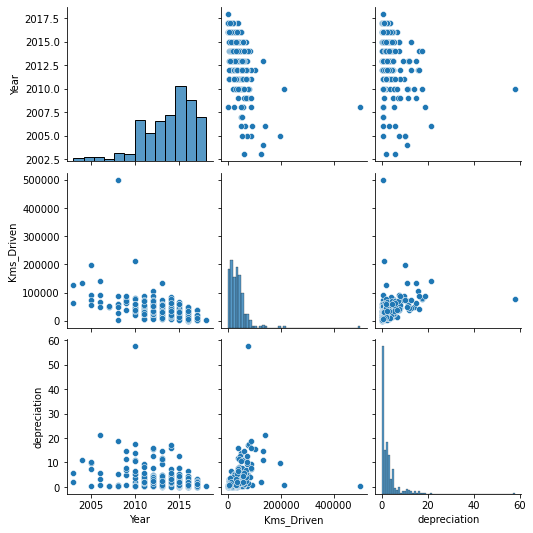

In [45]:
sns.pairplot(new_df)

In [ ]:
# The above graph gives us a more clear picture, 
# we can see from it that both Year and Kms Driven have an important say on depreciation

In [ ]:
# Let us analyze all the values that can have a say on cars depreciation**

In [46]:
final_val = df[['Car_Name', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'depreciation','Year', 'Transmission']]
final_val.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,depreciation,Year,Transmission
0,ritz,27000,Petrol,0,2.24,2014,1
1,sx4,43000,Diesel,0,4.79,2013,1
2,ciaz,6900,Petrol,0,2.60,2017,1
3,wagon r,5200,Petrol,0,1.30,2011,1
4,swift,42450,Diesel,0,2.27,2014,1


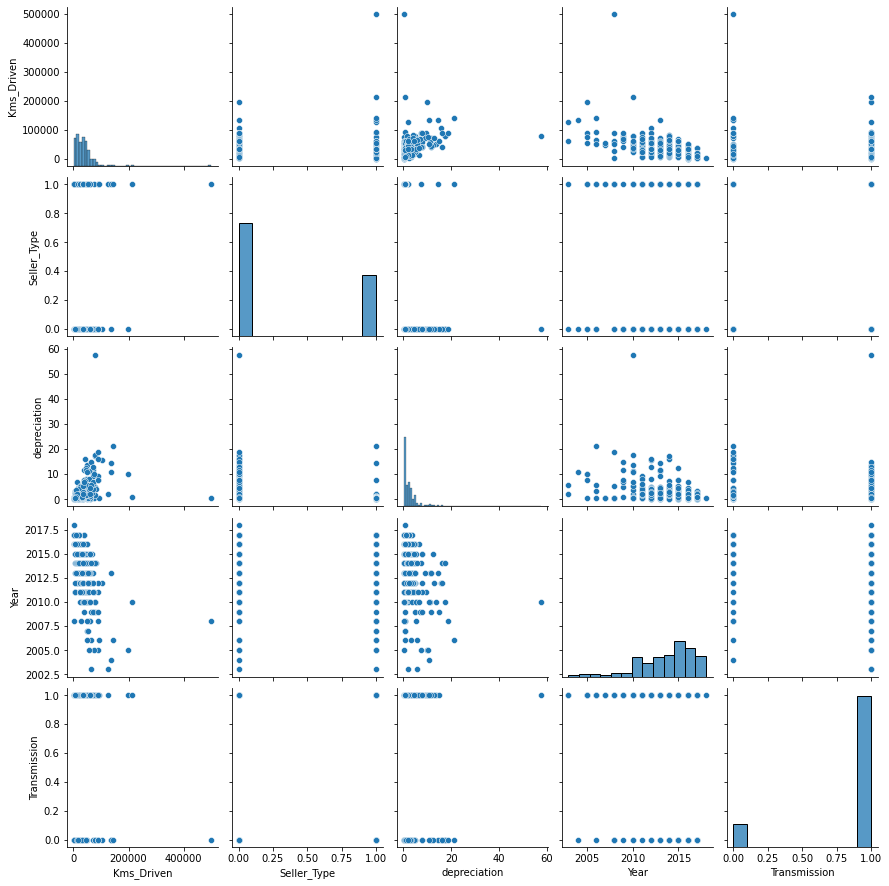

In [47]:
sns.pairplot(final_val)

In [ ]:
# The above graph shows that the variales such as transmission 
# and seller type does not have much impact on depreciation as compared to Kms Driven and Year,
# hence from this we can conclude that kms driven and year has a bigger impact on depreciation than other factors